# Effect of smoothness constraint

In this notebook we plot the components, activations and distance matrix for classic NMF and tsNMF with a large smoothness parameter to demonstrate the effect of adding this smoothness constraint.

In [1]:
import os
import glob
from collections import defaultdict
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.decomposition import NMF
import tsnmf

## Load low-rank MVBS data

In [2]:
MVBS_PCP_path = '../data/'
MVBS_rpca_file = '20150817-20151017_MVBS_time_Sv_rangeBin5_all_corrected_rpca.nc'

In [3]:
MVBS_rpca = xr.open_dataset(os.path.join(MVBS_PCP_path, MVBS_rpca_file))
low_rank = MVBS_rpca['low_rank']
n_observations, n_frequencies, n_depth_levels, n_pings = low_rank.shape

In [4]:
low_rank = low_rank.values.reshape([n_observations,-1])

In [5]:
low_rank_nonneg = low_rank - low_rank.min()
low_rank_nonneg.shape

(62, 15984)

## Traditional NMF

In [6]:
model_NMF = NMF(n_components=3, 
                init='nndsvd', 
                max_iter=10000)
H_NMF = model_NMF.fit_transform(low_rank_nonneg)
W_NMF = model_NMF.components_

In [7]:
H_multW_NMF = (H_NMF*np.linalg.norm(W_NMF, axis=1)).T  # transpose to match the tsNMF results
W_divW_NMF = W_NMF.T/np.linalg.norm(W_NMF, axis=1)

In [8]:
H_multW_NMF.shape, W_divW_NMF.shape

((3, 62), (15984, 3))

## tsNMF

### sm=0 case, nndsvd initialization

In [9]:
# sm=0
model_0_nndsvd = tsnmf.smoothNMF(n_components=3, 
                        max_iter=2000, 
                        smoothness=0, 
                        sparsity=0
                       )
model_0_nndsvd.fit(low_rank_nonneg.T, init='nndsvd')

Stopping at iteration set in max_iter.


We normalize the $\mathbf{W}$ components by its norm and multiply the norm to the $\mathbf{H}$ activations.

In [10]:
H_multW_0_nndsvd = (model_0_nndsvd.H.T*np.linalg.norm(model_0_nndsvd.W, axis=0)).T
W_divW_0_nndsvd = model_0_nndsvd.W/np.linalg.norm(model_0_nndsvd.W, axis=0)

In [11]:
# check shape
H_multW_0_nndsvd.shape, W_divW_0_nndsvd.shape

((3, 62), (15984, 3))

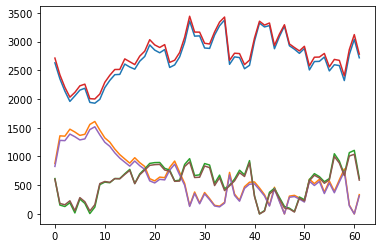

In [12]:
plt.plot(H_multW_NMF.T)
plt.plot(H_multW_0_nndsvd.T)

### sm=0 case, uniform initialization

Randomly set `random_state=100`:

In [13]:
# sm=0
model_0 = tsnmf.smoothNMF(n_components=3, 
                        max_iter=2000, 
                        smoothness=0, 
                        sparsity=0, 
                        early_stopping={'type': 'cost'}
                       )
model_0.fit(low_rank_nonneg.T, init='random', random_state=1190)

Stopping at iteration 985


We normalize the $\mathbf{W}$ components by its norm and multiply the norm to the $\mathbf{H}$ activations.

In [14]:
H_multW_0 = (model_0.H.T*np.linalg.norm(model_0.W, axis=0)).T
W_divW_0 = model_0.W/np.linalg.norm(model_0.W, axis=0)

In [15]:
# check shape
H_multW_0.shape, W_divW_0.shape

((3, 62), (15984, 3))

### sm=100 case, uniform initialization

In [16]:
# sm=1000
model_1e2 = tsnmf.smoothNMF(n_components=3, 
                        max_iter=2000, 
                        smoothness=100, 
                        sparsity=0, 
                        early_stopping={'type': 'cost'}
                       )
model_1e2.fit(low_rank_nonneg.T, init='random', random_state=1100)

Stopping at iteration 1362


We normalize the $\mathbf{W}$ components by its norm and multiply the norm to the $\mathbf{H}$ activations.

In [17]:
H_multW_1e2 = (model_1e2.H.T*np.linalg.norm(model_1e2.W, axis=0)).T
W_divW_1e2 = model_1e2.W/np.linalg.norm(model_1e2.W, axis=0)

In [18]:
# check shape
H_multW_1e2.shape, W_divW_1e2.shape

((3, 62), (15984, 3))

### sm=5e5 case, uniform initialization

From `select_representative_run.ipynb` we selected the tsNMF run with `random_seed=1190`. Here we use this initial condition to perform the decomposition again.

In [19]:
# sm=5e5
model_5e5 = tsnmf.smoothNMF(n_components=3, 
                        max_iter=2000, 
                        smoothness=500000, 
                        sparsity=0, 
                        early_stopping={'type': 'cost'}
                       )
model_5e5.fit(low_rank_nonneg.T, init='random', random_state=1190)

Stopping at iteration 702


We normalize the $\mathbf{W}$ components by its norm and multiply the norm to the $\mathbf{H}$ activations.

In [20]:
H_multW_5e5 = (model_5e5.H.T*np.linalg.norm(model_5e5.W, axis=0)).T
W_divW_5e5 = model_5e5.W/np.linalg.norm(model_5e5.W, axis=0)

In [21]:
# check shape
H_multW_5e5.shape, W_divW_5e5.shape

((3, 62), (15984, 3))

### sm=5e6 case, uniform initialization

From `select_representative_run_sm5e6.ipynb` we selected the tsNMF run with `random_seed=2930`. Here we use this initial condition to perform the decomposition again.

In [22]:
# sm=5e6
model_5e6 = tsnmf.smoothNMF(n_components=3, 
                        max_iter=2000, 
                        smoothness=5000000, 
                        sparsity=0, 
                        early_stopping={'type': 'cost'}
                       )
model_5e6.fit(low_rank_nonneg.T, init='random', random_state=2930)

Stopping at iteration 688


We normalize the $\mathbf{W}$ components by its norm and multiply the norm to the $\mathbf{H}$ activations.

In [23]:
H_multW_5e6 = (model_5e6.H.T*np.linalg.norm(model_5e6.W, axis=0)).T
W_divW_5e6 = model_5e6.W/np.linalg.norm(model_5e6.W, axis=0)

In [24]:
# check shape
H_multW_5e6.shape, W_divW_5e6.shape

((3, 62), (15984, 3))

## Compare cost drop under different init conditions for small smoothness parameter

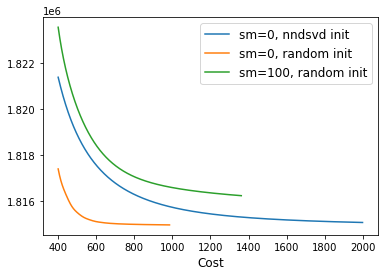

In [25]:
start_run_num = 400
for mm, nn in zip([model_0_nndsvd, model_0, model_1e2], 
                  ['sm=0, nndsvd init', 'sm=0, random init', 'sm=100, random init']):
    y_ = np.array(mm.cost[start_run_num:])
    x_ = np.arange(y_.size)+start_run_num
    plt.plot(x_, y_, label=nn)
plt.legend(fontsize=12)
plt.xlabel('Run number', fontsize=12)
plt.xlabel('Cost', fontsize=12)
plt.show()

In [26]:
model_0_nndsvd.cost[-1], model_0.cost[-1]

(1815077.2437574714, 1814971.4805551667)

## Match component order

We match the order of component based on the sequence of classic NMF (tsNMF sm=0 case, random init) results.

In [27]:
def match_factors_by_H(Hs, Hs_ref):
    """Order Hs based on Hs_ref.
    """
    rank_num, _ = Hs.shape
    rho = np.corrcoef(Hs_ref, Hs)[:rank_num,rank_num:]
    index = [0 for r in range(rank_num)]
    for p in range(rank_num):
        index_max = np.argmax(rho)
        # index = np.argsort(rho, axis=1)
        i,j = np.unravel_index(index_max,(rank_num,rank_num))
        rho[:,j] = -2
        rho[i,:] = -2
        index[i] = j
    
    return np.array(index).astype(int)

In [28]:
H_seq_NMF = match_factors_by_H(H_NMF.T, Hs_ref=model_0.H)
H_seq_0_nndsvd = match_factors_by_H(model_0_nndsvd.H, Hs_ref=model_0.H)
H_seq_1e2 = match_factors_by_H(model_1e2.H, Hs_ref=model_0.H)
H_seq_5e5 = match_factors_by_H(model_5e5.H, Hs_ref=model_0.H)
H_seq_5e6 = match_factors_by_H(model_5e6.H, Hs_ref=model_0.H)

## Compare activation

In [29]:
# Assemble dataset for activation
ds_activation = xr.Dataset(
    {
        'H_NMF_nndsvd': (['day', 'component'], H_multW_NMF[H_seq_NMF, :].T),
        'H_tsNMF_sm0_nndsvd': (['day', 'component'], H_multW_0_nndsvd[H_seq_0_nndsvd, :].T),
        'H_tsNMF_sm0_rand': (['day', 'component'], H_multW_0.T),
        'H_tsNMF_sm1e2_rand': (['day', 'component'], H_multW_1e2[H_seq_1e2, :].T),
        'H_tsNMF_sm5e5_rand': (['day', 'component'], H_multW_5e5[H_seq_5e5, :].T),
        'H_tsNMF_sm5e6_rand': (['day', 'component'], H_multW_5e6[H_seq_5e6, :].T)
    },
    coords={
        'component': np.arange(3),
        'day': MVBS_rpca['low_rank'].date.values
    }
)

In [30]:
panel_ls=12
title_ls=10
freq_ls=8
comp_ls=8
axis_ls=8
legend_ls=6
tick_ls=10
pad_size=1

In [31]:
def plot_activation(axx, H_name):
    h1 = ds_activation[H_name].plot.line(x='day', ax=axx,
                                   add_legend=False, _labels=False)
    axx.xaxis.set_major_locator(
        mdates.MonthLocator(bymonth=range(8,11), bymonthday=[1,15]))
    axx.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    axx.xaxis.set_minor_locator(mdates.AutoDateLocator())
    axx.set_xlim([datetime.date(2015,8,16), datetime.date(2015,10,18)])
    axx.set_title(H_name)
    axx.tick_params(labelsize=tick_ls, pad=pad_size)


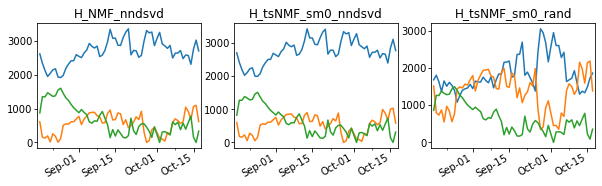

In [32]:
fig,ax = plt.subplots(1, 3, figsize=(10,2.3))
plot_activation(ax[0], 'H_NMF_nndsvd')
plot_activation(ax[1], 'H_tsNMF_sm0_nndsvd')
plot_activation(ax[2], 'H_tsNMF_sm0_rand')

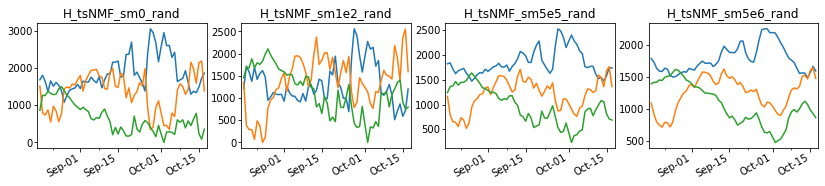

In [33]:
fig,ax = plt.subplots(1, 4, figsize=(14,2.3))
# plt.subplots_adjust(hspace=0.4)
plot_activation(ax[0], 'H_tsNMF_sm0_rand')
plot_activation(ax[1], 'H_tsNMF_sm1e2_rand')
plot_activation(ax[2], 'H_tsNMF_sm5e5_rand')
plot_activation(ax[3], 'H_tsNMF_sm5e6_rand')

## Compare components

In [34]:
W_divW_NMF_reshaped = (W_divW_NMF[:, H_seq_NMF].T
                       .reshape(3, n_frequencies*n_depth_levels, n_pings))
W_divW_0_nndsvd_reshaped = (W_divW_0_nndsvd[:, H_seq_0_nndsvd].T
                            .reshape(3, n_frequencies*n_depth_levels, n_pings))
W_divW_0_reshaped =   (W_divW_0[:, :].T
                       .reshape(3, n_frequencies*n_depth_levels, n_pings))
W_divW_1e2_reshaped = (W_divW_1e2[:, H_seq_1e2].T
                       .reshape(3, n_frequencies*n_depth_levels, n_pings))
W_divW_5e5_reshaped = (W_divW_5e5[:, H_seq_5e5].T
                       .reshape(3, n_frequencies*n_depth_levels, n_pings))
W_divW_5e6_reshaped = (W_divW_5e6[:, H_seq_5e6].T
                       .reshape(3, n_frequencies*n_depth_levels, n_pings))

In [35]:
# check dimension
W_divW_0_reshaped.shape

(3, 111, 144)

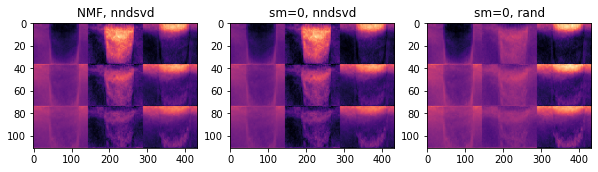

In [36]:
fig,ax = plt.subplots(1, 3, figsize=(10,2.3))
ax[0].imshow(np.hstack(W_divW_NMF_reshaped), aspect='auto', cmap='magma')
ax[0].set_title('NMF, nndsvd')
ax[1].imshow(np.hstack(W_divW_0_nndsvd_reshaped), aspect='auto', cmap='magma')
ax[1].set_title('sm=0, nndsvd')
ax[2].imshow(np.hstack(W_divW_0_reshaped), aspect='auto', cmap='magma')
ax[2].set_title('sm=0, rand')
plt.show()

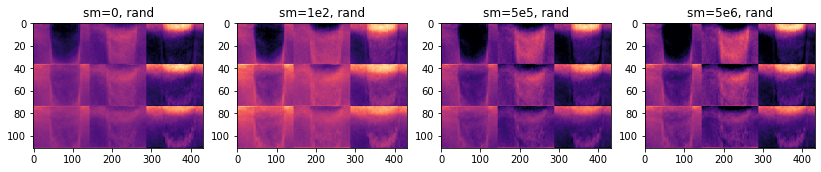

In [37]:
fig,ax = plt.subplots(1, 4, figsize=(14,2.3))
ax[0].imshow(np.hstack(W_divW_0_reshaped), aspect='auto', cmap='magma')
ax[0].set_title('sm=0, rand')
ax[1].imshow(np.hstack(W_divW_1e2_reshaped), aspect='auto', cmap='magma')
ax[1].set_title('sm=1e2, rand')
ax[2].imshow(np.hstack(W_divW_5e5_reshaped), aspect='auto', cmap='magma')
ax[2].set_title('sm=5e5, rand')
ax[3].imshow(np.hstack(W_divW_5e6_reshaped), aspect='auto', cmap='magma')
ax[3].set_title('sm=5e6, rand')
plt.show()

In [38]:
def plot_component(axx, WW, title_str, vlim=None):
    if vlim is None:
        im = axx.imshow(np.hstack(WW), aspect='auto', 
                        cmap='magma', interpolation='none')
    else:
        im = axx.imshow(np.hstack(WW), aspect='auto', 
                        cmap='magma', interpolation='none', vmin=vlim[0], vmax=vlim[1])
    axx.set_title(title_str, fontsize=14)

    pos = axx.get_position()
    cax = fig.add_axes([pos.x0+pos.width+0.01, 
                        pos.y0, 
                        0.01, 
                        pos.y0+pos.height-pos.y0])
    cbar = plt.colorbar(im, cax=cax)

## Compare distance matrix calculated from activation

In [39]:
from scipy.spatial.distance import pdist, squareform

In [40]:
def calc_distance_mtx(HH):
    DD = pdist(HH.T, 'euclidean')
    DD = (DD-DD.min())/(DD.max()-DD.min())  # normalize to between 0-1
    return DD

In [41]:
def plot_distance_mtx(axx, DD, title_str):
    im = axx.imshow(squareform(DD), cmap='RdYlBu', interpolation='none')
    axx.set_title(title_str, fontsize=14)

    pos = axx.get_position()
    cax = fig.add_axes([pos.x0+pos.width+0.01, 
                        pos.y0, 
                        0.01, 
                        pos.y0+pos.height-pos.y0])
    plt.ylabel('Euclidean distance', fontsize=14)
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.set_ylabel('Euclidean distance', rotation=90, fontsize=12)

In [42]:
D_NMF = calc_distance_mtx(H_multW_NMF)
D_tsNMF_0 = calc_distance_mtx(H_multW_0)
D_tsNMF_0_nndsvd = calc_distance_mtx(H_multW_0_nndsvd)
D_tsNMF_1e2 = calc_distance_mtx(H_multW_1e2)
D_tsNMF_5e5 = calc_distance_mtx(H_multW_5e5)
D_tsNMF_5e6 = calc_distance_mtx(H_multW_5e6)

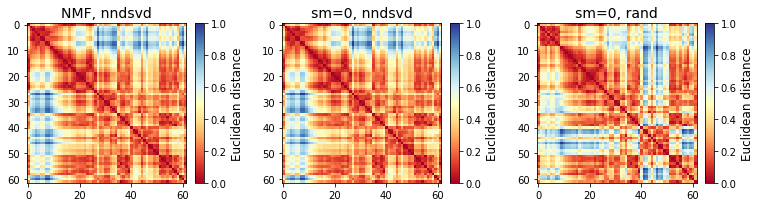

In [43]:
fig,ax = plt.subplots(1, 3, figsize=(12,3))
plt.subplots_adjust(wspace=0.6)
plot_distance_mtx(ax[0], D_NMF, 'NMF, nndsvd')
plot_distance_mtx(ax[1], D_tsNMF_0_nndsvd, 'sm=0, nndsvd')
plot_distance_mtx(ax[2], D_tsNMF_0, 'sm=0, rand')
plt.show()

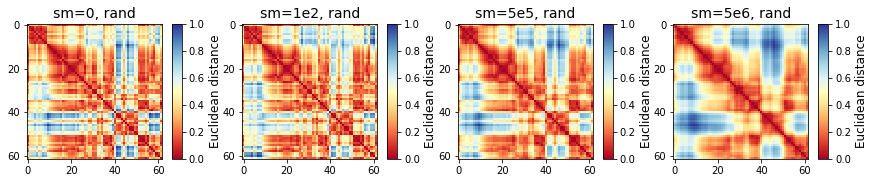

In [44]:
fig,ax = plt.subplots(1, 4, figsize=(14,4))
plt.subplots_adjust(wspace=0.6)
plot_distance_mtx(ax[0], D_tsNMF_0, 'sm=0, rand')
plot_distance_mtx(ax[1], D_tsNMF_1e2, 'sm=1e2, rand')
plot_distance_mtx(ax[2], D_tsNMF_5e5, 'sm=5e5, rand')
plot_distance_mtx(ax[3], D_tsNMF_5e6, 'sm=5e6, rand')
plt.show()

## Fig. SX: putting everything together

In [45]:
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as colors

In [46]:
# Set date locator and formatter to use with plt.plot_dates
date1 = datetime.datetime(2015, 8, 17, 0, 0, 0)
date2 = datetime.datetime(2015, 10, 17, 23, 59, 59)
locator = mdates.AutoDateLocator().get_locator(date1, date2)
formatter = mdates.AutoDateFormatter(locator)
(type(locator), type(formatter))

x_lims = mdates.date2num([date1, date2])
y_lims = mdates.date2num([date1, date2])

In [47]:
# Find common vmax and vmin
W_vmax = np.hstack((W_divW_0_nndsvd, W_divW_0, W_divW_5e5, W_divW_5e6)).max()
W_vmin = np.hstack((W_divW_0_nndsvd, W_divW_0, W_divW_5e5, W_divW_5e6)).min()

In [48]:
title_size = 14
panel_label_size = 14
tick_label_size = 8
ylabel_size = 9
pad_size = 0

In [49]:
def plot_pattern_sm(gs, WW, vlim):
    axx = []
    for seq in range(3):  # loop through 3 components
        axx.append(fig.add_subplot(gs[0, seq]))
        im = axx[-1].imshow(WW[seq,:,:], aspect='auto',
                            vmax=vlim[1], vmin=vlim[0], cmap='magma', interpolation='none')
    return axx, im

In [50]:
def plot_activation_sm(axx, H_name):
    h1 = ds_activation[H_name].plot.line(x='day', ax=axx,
                                         add_legend=False, _labels=False, lw=1)
    axx.xaxis.set_major_locator(
        mdates.MonthLocator(bymonth=range(8,11), bymonthday=[1,15]))
    axx.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    axx.xaxis.set_minor_locator(mdates.AutoDateLocator())
    axx.set_xlim([datetime.date(2015,8,16), datetime.date(2015,10,18)])
    axx.tick_params(labelsize=tick_label_size, pad=pad_size)

In [51]:
def plot_distance_mtx_on_ax(axx, DD, colormap='RdYlBu'):
    im = axx.imshow(squareform(DD), 
                    cmap=colormap, aspect='auto', interpolation='none',
                    extent = [x_lims[0], x_lims[1],  y_lims[1], y_lims[0]])
    axx.xaxis_date()
    axx.xaxis.set_major_locator(
        mdates.MonthLocator(bymonth=range(8,11), bymonthday=[1,15]))
    axx.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    axx.xaxis.set_minor_locator(mdates.AutoDateLocator())
    axx.yaxis_date()
    axx.yaxis.set_major_locator(
        mdates.MonthLocator(bymonth=range(8,11), bymonthday=[1,15]))
    axx.yaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    axx.yaxis.set_minor_locator(mdates.AutoDateLocator())
    plt.setp(axx.get_xticklabels(), rotation=20, 
             fontsize=tick_label_size, horizontalalignment='right')
    plt.setp(axx.get_yticklabels(), rotation=20, 
             fontsize=tick_label_size, horizontalalignment='right')
    axx.tick_params(axis='both', which='major', pad=pad_size)
    axx.tick_params(labelsize=tick_label_size) 
    #     axx.set_aspect('equal', 'box')
    axx.set_xlabel('Time', fontsize=title_ls)
    return im

In [52]:
def plot_daily_echogram_colorbar(im, pos):
    cax = fig.add_axes(pos)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_ticks(np.arange(0,0.035,0.01))
    cbar.ax.tick_params(labelsize=tick_ls, pad=pad_size)
    cbar.ax.set_ylabel('Relative strength\n(normalized)', rotation=90, fontsize=ylabel_size)
    return cbar

In [53]:
def plot_distance_mtx_colorbar(im, pos):
    cax = fig.add_axes(pos)
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=tick_ls, pad=pad_size)
    cbar.ax.tick_params(labelsize=tick_label_size) 
    cbar.ax.set_ylabel('Euclidean distance\n(normalized)', rotation=90, fontsize=ylabel_size)
    return cbar

In [54]:
def plot_daily_echogram_pattern_scale(ax_ex):
    ax_ex.set_xticks([])
    ax_ex.set_yticks([])
    ax_ex.set_facecolor(np.ones(3)*0.6)

    trans = ax_ex.transAxes
    # add a line for horizontal scale
    ax_ex.plot([-0.00,0.98],[-0.1,-0.1],
                color='k', lw=1.5, transform=trans, clip_on=False)
    ax_ex.annotate('24 hr', xy=(0.2,-0.5), xycoords=trans, 
                    ha='left', va='bottom', fontsize=axis_ls)
    trans = ax_ex.get_yaxis_transform()
    # add a line for vertical scale
    ax_ex.plot([1.08,1.08],[0.,1], 
                color='k', lw=1.5, transform=trans, clip_on=False)
    ax_ex.annotate('200 m', xy=(1.525,0.6), xycoords=trans, 
                    ha='center', va='top', rotation=0, fontsize=axis_ls)
    fig.text(x=-0.5, y=0.5, s='Scale:', 
             transform=ax_ex.transAxes, fontsize=tick_ls, 
             rotation=0, ha='center', va='center')

In [55]:
def set_ax_ticks(ax):
    """Plot the tick marks for component panels
    """
    ax.set_xticks([])
    ax.set_yticks(np.arange(0,n_depth_levels*3,n_depth_levels)-1)
    ax.set_yticklabels('')
    ax.grid()

In [56]:
def adjust_axis_sizes():
    for axx_pat, axx_act in zip([ax_pattern_sm0, ax_pattern_sm5e5, ax_pattern_sm5e6],
                                [ax_activation_sm0, ax_activation_sm5e5, ax_activation_sm5e6]):
        pos_pat_L = axx_pat[0].get_position()    # pattern L axis
        pos_pat_R = axx_pat[-1].get_position()   # pattern R axis
        pos_act = axx_act.get_position()      # activation axis
        axx_act.set_position([pos_pat_L.x0,   # left
                              pos_act.y0,     # bottom
                              pos_pat_R.x0+pos_pat_R.width-pos_pat_L.x0,  # width
                              pos_act.height])  # height

In [57]:
# Set custom color cycle
cmap = plt.cm.get_cmap('YlGnBu')

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=cmap([0.3,0.6,1.0]))

In [58]:
def add_daily_echogram_labels():
    for axx_list in [ax_pattern_sm0, ax_pattern_sm5e5, ax_pattern_sm5e6]:
        # move ticks
        [set_ax_ticks(axx) for axx in axx_list]
        # add frequency for echogram patterns
        [fig.text(
                x=-0.35, y=yy, s=ss, transform=axx_list[0].transAxes,
                fontsize=freq_ls,
                ha='center', va='center')
            for ss,yy in zip(['200', '120', '38'], [0.15, 0.5, 0.825])]
        # add component label
        [axx_list[x-1].set_title('#%d' % x, fontsize=tick_ls, pad=3) for x in np.arange(1,4,1)]
    for axx, tstr in zip([ax_pattern_sm0, ax_pattern_sm5e5, ax_pattern_sm5e6], 
                         ['$\eta$=0', '$\eta$=5e5', '$\eta$=5e6']):
        fig.text(x=0.5, y=1.2, s=tstr, fontsize=title_ls, 
                 transform=axx[1].transAxes, ha='center', va='center')

### sm=0 random init

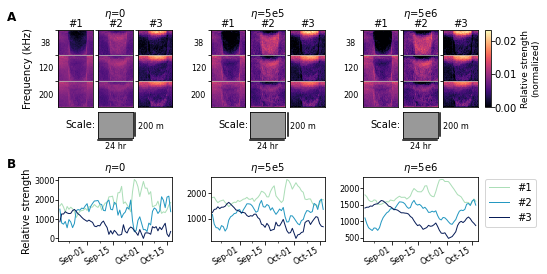

In [59]:
fig = plt.figure(figsize=(7+1/16,6))

gs_top_L = fig.add_gridspec(1,3, bottom=0.82, top=1.0, left=0.05,  right=0.275, wspace=0.15)
gs_top_M = fig.add_gridspec(1,3, bottom=0.82, top=1.0, left=0.35,  right=0.575, wspace=0.15)
gs_top_R = fig.add_gridspec(1,3, bottom=0.82, top=1.0, left=0.65,  right=0.875, wspace=0.15)
gs_mid = fig.add_gridspec(1,3, bottom=0.51, top=0.66, left=0.05,  right=0.875)#, wspace=0.15)

# Daily echogram patterns
ax_pattern_sm0, im = plot_pattern_sm(gs_top_L, W_divW_0_reshaped, vlim=[W_vmin, W_vmax])
ax_pattern_sm5e5, _ = plot_pattern_sm(gs_top_M, W_divW_5e5_reshaped, vlim=[W_vmin, W_vmax])
ax_pattern_sm5e6, _ = plot_pattern_sm(gs_top_R, W_divW_5e6_reshaped, vlim=[W_vmin, W_vmax])
pos_ref = ax_pattern_sm5e6[-1].get_position()
pos = [pos_ref.x0+pos_ref.width+0.015, pos_ref.y0, 0.012, pos_ref.height]
plot_daily_echogram_colorbar(im, pos)
add_daily_echogram_labels()
    
# Add echogram panel label
fig.text(x=-0.05,y=1.02,s='A', transform=fig.transFigure,  # position relative to figure
         fontsize=panel_ls, fontweight='bold')
fig.text(x=-0.01, y=0.91, s='Frequency (kHz)', transform=fig.transFigure,  # position relative to figure
         fontsize=title_ls, rotation=90, ha='center', va='center')
 
# Activation
ax_activation_sm0 = fig.add_subplot(gs_mid[0])
plot_activation_sm(ax_activation_sm0, 'H_tsNMF_sm0_rand')
ax_activation_sm5e5 = fig.add_subplot(gs_mid[1])
plot_activation_sm(ax_activation_sm5e5, 'H_tsNMF_sm5e5_rand')
ax_activation_sm5e6 = fig.add_subplot(gs_mid[2])
plot_activation_sm(ax_activation_sm5e6, 'H_tsNMF_sm5e6_rand')
for axx, tstr in zip([ax_activation_sm0, ax_activation_sm5e5, ax_activation_sm5e6], 
                     ['$\eta$=0', '$\eta$=5e5', '$\eta$=5e6']):
    axx.set_title(tstr, fontsize=title_ls)
    
# Add activation component legend
ax_activation_sm5e6.legend(['#1', '#2', '#3'], fontsize=tick_ls,
                           bbox_to_anchor=(1.02, 0.15), loc='lower left', ncol=1)
# Add activation panel label
fig.text(x=-0.05,y=0.68,s='B', transform=fig.transFigure, 
         fontsize=panel_ls, fontweight='bold')
fig.text(x=-0.012, y=0.58, s='Relative strength', transform=fig.transFigure,
         fontsize=title_ls, rotation=90, ha='center', va='center')

# Adjust axis sizes
adjust_axis_sizes()

# Add example axis for daily echogram patterns
gs_top_L = fig.add_gridspec(1,3, bottom=0.82, top=1.0, left=0.05,  right=0.275, wspace=0.15)
gs_top_M = fig.add_gridspec(1,3, bottom=0.82, top=1.0, left=0.35,  right=0.575, wspace=0.15)
gs_top_R = fig.add_gridspec(1,3, bottom=0.82, top=1.0, left=0.65,  right=0.875, wspace=0.15)

for L,R,ax_ref in zip([0.05,  0.35,  0.65],
                      [0.275, 0.575, 0.875], 
                      [ax_pattern_sm0, ax_pattern_sm5e5, ax_pattern_sm5e6]):
    gs_ex = fig.add_gridspec(1,3, bottom=0.75, top=0.85, left=L, right=R)
    ax_ex = fig.add_subplot(gs_ex[1])
    pos_ex = ax_ex.get_position()
    pos_pat_M = ax_ref[1].get_position()   # echogram ref axis
    ax_ex.set_position([pos_pat_M.x0, pos_ex.y0, pos_pat_M.width, pos_pat_M.height/3])
    plot_daily_echogram_pattern_scale(ax_ex)

# Save figure
fig.savefig(os.path.join('../figs', 'fig_si_sm_effects.png'),
            dpi=150, bbox_inches = 'tight', pad_inches = 0.05)

plt.show()